#Importing Dependencies

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sklearn.cluster as cluster
import sklearn.metrics as skmet
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster, metrics as skmet
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("ML_Projects/API_19_DS2_en_csv_v2_5455435.csv")

#EDA

In [ ]:
# Use df.isna().sum() to get count of missing values for each column
missing_counts = df.isna().sum()

# Display the counts
print(missing_counts)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


#Selecting Indicators

In [141]:
indicators = ['Total greenhouse gas emissions (kt of CO2 equivalent)', 'CO2 emissions (metric tons per capita)', 'Renewable energy consumption (% of total final energy consumption)']
tmp1 = df.loc[df['Indicator Name'] == indicators[1]]
tmp2 = df.loc[df['Indicator Name'] == indicators[0]]
tmp3 = df.loc[df['Indicator Name'] == indicators[2]]
tmp = pd.concat([tmp1, tmp2, tmp3])
tmp

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
41,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,9.769728e-01,9.363657e-01,9.026671e-01,9.046189e-01,9.063482e-01,9.263477e-01,9.368596e-01,9.576127e-01,9.580026e-01,8.967528e-01,8.862962e-01,9.542187e-01,9.561543e-01,9.828677e-01,1.027650e+00,1.002883e+00,9.913553e-01,1.007887e+00,1.047522e+00,9.853274e-01,1.011862e+00,9.702062e-01,9.835165e-01,9.956795e-01,1.006890e+00,9.566931e-01,9.385600e-01,9.284881e-01,9.081266e-01,9.038001e-01,NaN,NaN
193,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2.224418e-01,2.078860e-01,1.150966e-01,9.578070e-02,8.345802e-02,7.554033e-02,6.872788e-02,6.173541e-02,5.623709e-02,4.222117e-02,3.889990e-02,3.732296e-02,4.921988e-02,5.381762e-02,4.392573e-02,6.357785e-02,6.933867e-02,6.838549e-02,1.348853e-01,1.781236e-01,2.520835e-01,3.052597e-01,2.651908e-01,1.898168e-01,1.491505e-01,1.761800e-01,1.531210e-01,1.341869e-01,1.653669e-01,1.608502e-01,NaN,NaN
269,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,4.689895e-01,5.202691e-01,5.575302e-01,5.136116e-01,4.621416e-01,4.923474e-01,5.539374e-01,5.395826e-01,5.054253e-01,5.018567e-01,5.256927e-01,5.392312e-01,4.970960e-01,5.153259e-01,5.011345e-01,5.011951e-01,4.672930e-01,4.352979e-01,4.492913e-01,4.235020e-01,4.644603e-01,4.687308e-01,4.722660e-01,4.992016e-01,5.068677e-01,4.854116e-01,4.908028e-01,4.748870e-01,4.782753e-01,4.858677e-01,NaN,NaN
345,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.549413e-01,5.458148e-01,5.444129e-01,7.109686e-01,8.392738e-01,9.142789e-01,1.073637e+00,1.086339e+00,1.091186e+00,1.109804e+00,9.884286e-01,9.418244e-01,8.957282e-01,9.249936e-01,9.298164e-01,8.128854e-01,8.212688e-01,8.114183e-01,8.886145e-01,9.394618e-01,9.759211e-01,9.837912e-01,9.475871e-01,1.031047e+00,1.092208e+00,1.125189e+00,1.020928e+00,8.026581e-01,7.660503e-01,7.792922e-01,NaN,NaN
421,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.820941e+00,1.242076e+00,6.828775e-01,6.370924e-01,6.464464e-01,6.049688e-01,6.135384e-01,4.661909e-01,5.734035e-01,9.567489e-01,1.024947e+00,1.056868e+00,1.233002e+00,1.337603e+00,1.403827e+00,1.339338e+00,1.341533e+00,1.393359e+00,1.385906e+00,1.439991e+00,1.527521e+00,1.670353e+00,1.502965e+00,1.532179e+00,1.668476e+00,1.603810e+00,1.556656e+00,1.790457e+00,1.781692e+00,1.691968e+00,NaN,NaN
497,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,7.592152e+00,7.336725e+00,7.099907e+00,6.937048e+00,6.663237e+00,6.754132e+00,7.082732e+00,7.194088e+00,7.531924e+00,7.812962e+00,7.927016e+00,7.725627e+00,7.498765e+00,7.238069e+00,7.286756e+00,7.206274e+00,6.805400e+00,6.890390e+00,7.081822e+00,6.995396e+00,7.223591e+00,6.957586e+00,6.862293e+00,6.674233e+00,6.445931e+00,6.485769e+00,6.465288e+00,6.302098e+00,6.594057e+00,6.573595e+00,NaN,NaN
573,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2.799332e+00,2.749168e+00,2.911693e+00,3.052488e+00,3.149410e+00,3.166797e+00,3.201945e+00,3.280430e+00,3.223928e+00,3.194006e+00,3.252753e+00,3.357020e+00,3.396012e+00,3.423837e+00,3.531226e+00,3.686096e+00,3.786231e+00,3.838802e+00,4.038599e+00,4.067266e+00,4.206228e+00,4.205058e+00,4.400961e+00,4.378777e+00,4.427319e+00,4.446687e+00,4.403927e+00,4.361316e+00,4.222125e+00,4.247838e+00,NaN,NaN
649,United Arab Emirates,ARE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2.905653e+01,3.065391e+01,2.821237e+01,2.861618e+01,3.039123e+01,3.088306e+01,3.052425e+01,2.965749e+01,2.856816e+01,2.766094e+01,2.586940e+01,2.813912e+01,2.728594e+01,2.722527e+01,2.

In [142]:
df_co3 = tmp2[["1990", "2000", "2010", "2015"]]
print(df_co3.describe())


               1990          2000          2010          2015
count  2.380000e+02  2.390000e+02  2.390000e+02  2.390000e+02
mean   1.130058e+06  1.250139e+06  1.667081e+06  1.794320e+06
std    3.416454e+06  3.762545e+06  5.096699e+06  5.534535e+06
min    7.617000e+00  1.979100e+01  2.281500e+01  2.172900e+01
25%    8.435594e+03  9.742949e+03  1.212117e+04  1.220785e+04
50%    4.149226e+04  4.610246e+04  5.874215e+04  5.434607e+04
75%    3.816534e+05  4.399891e+05  5.086038e+05  4.647635e+05
max    3.061425e+07  3.416452e+07  4.338731e+07  4.608531e+07


In [143]:
df_co3.dropna(axis=0)

,1990,2000,2010,2015
110,8.070054e+05,9.459900e+05,1.306067e+06,1.369676e+06
186,1.196896e+04,1.388743e+04,2.711590e+04,2.708607e+04
262,3.983188e+05,5.694142e+05,6.574918e+05,7.483331e+05
338,4.315443e+04,5.764398e+04,7.772867e+04,8.736050e+04
414,1.109769e+04,8.135064e+03,8.899166e+03,9.223670e+03
490,4.307030e+02,5.881180e+02,6.270150e+02,5.792290e+02
566,1.115031e+06,1.611571e+06,2.337485e+06,2.685780e+06
642,7.325164e+04,1.090154e+05,2.018925e+05,2.452216e+05
718,2.473029e+05,2.908229e+05,3.396070e+05,3.700009e+05
794,2.440961e+04,5.990513e+03,7.561357e+03,9.155671e+03


          1990      2000      2010      2015
1990  1.000000  0.994803  0.966216  0.951774
2000  0.994803  1.000000  0.979360  0.967405
2010  0.966216  0.979360  1.000000  0.998543
2015  0.951774  0.967405  0.998543  1.000000


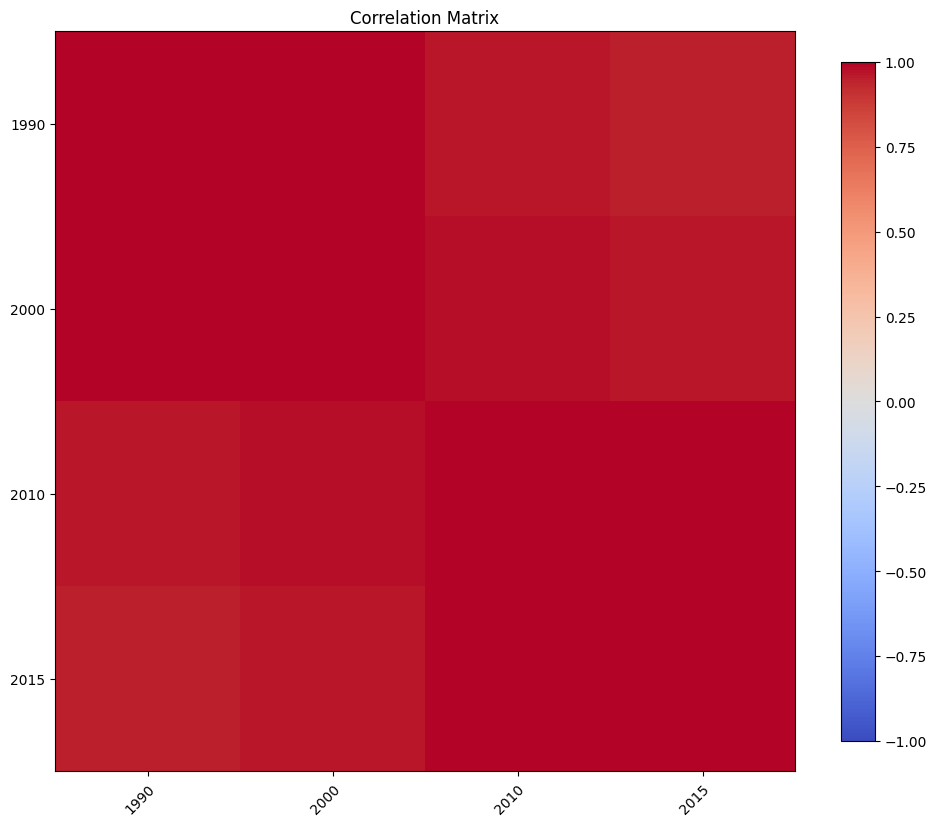

In [144]:
import cluster_tools as ct

corr = df_co3.corr()
print(corr)
corr = df_co3.corr()

# plot the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)

# set the x and y axis labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# rotate the x axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# create a colorbar
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.7)

# set the title
ax.set_title("Correlation Matrix")

# show the plot
plt.tight_layout()
plt.show()


#Performing Cluster Analysis

In [146]:
df_ex = df_co3[["1990", "2015"]]  # extract the two columns for clustering

df_ex = df_ex.dropna()  # entries with one nan are useless
df_ex = df_ex.reset_index()
print(df_ex.iloc[0:15])

# reset_index() moved the old index into column index
# remove before clustering
df_ex = df_ex.drop("index", axis=1)
print(df_ex.iloc[0:15])

# normalize the data
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_ex)

print(df_norm[:10])

print()
print("n  score")


    index         1990         2015
0     110   807005.448  1369675.824
1     186    11968.960    27086.070
2     262   398318.783   748333.110
3     338    43154.430    87360.500
4     414    11097.690     9223.670
5     490      430.703      579.229
6     566  1115031.335  2685779.643
7     642    73251.640   245221.600
8     718   247302.900   370000.900
9     794    24409.610     9155.671
10    946      353.008     1086.616
11   1022   486998.600   596976.300
12   1098    76613.110    76339.480
13   1174    75682.810    50518.140
14   1250     1804.492     3616.525
           1990         2015
0    807005.448  1369675.824
1     11968.960    27086.070
2    398318.783   748333.110
3     43154.430    87360.500
4     11097.690     9223.670
5       430.703      579.229
6   1115031.335  2685779.643
7     73251.640   245221.600
8    247302.900   370000.900
9     24409.610     9155.671
10      353.008     1086.616
11   486998.600   596976.300
12    76613.110    76339.480
13    75682.810   

In [147]:
# loop over number of clusters
for ncluster in range(2, 10):
    
    # set up the clusterer with the number of expected clusters
    kmeans = cluster.KMeans(n_clusters=ncluster)

    # Fit the data, results are stored in the kmeans object
    kmeans.fit(df_norm)     # fit done on x,y pairs

    labels = kmeans.labels_
    
    # extract the estimated cluster centres
    cen = kmeans.cluster_centers_

    # calculate the silhoutte score
    print(ncluster, skmet.silhouette_score(df_ex, labels))

# do clustering with 7 clusters
ncluster = 7

# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)

# Fit the data, results are stored in the kmeans object
kmeans.fit(df_norm)     # fit done on x,y pairs

labels = kmeans.labels_
    
# extract the estimated cluster centres
cen = kmeans.cluster_centers_

cen = np.array(cen)
xcen = cen[:, 0]
ycen = cen[:, 1]



C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 0.9078210627547298


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3 0.8944339927156782


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4 0.8712206646241564


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5 0.8758876673767269


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 0.820250897903126


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7 0.8170991942413823


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8 0.8203337743251832


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9 0.8214090673916182


C:\Users\humus\ML_Projects\env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\humus\AppData\Local\Temp\ipykernel_14580\4063143906.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab10')


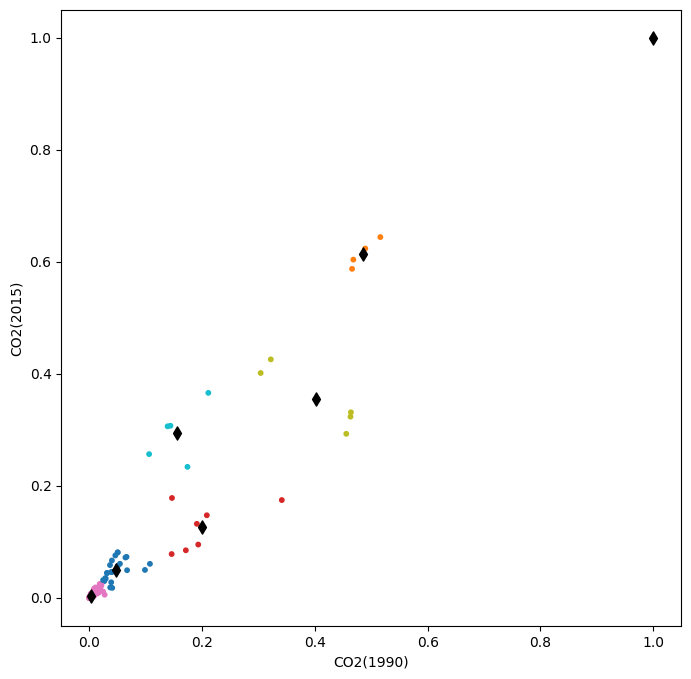

In [131]:
# cluster by cluster
plt.figure(figsize=(8.0, 8.0))

cm = plt.cm.get_cmap('tab10')
plt.scatter(df_norm[:,0], df_norm[:,1], 10, labels, marker="o", cmap=cm)
plt.scatter(xcen, ycen, 45, "k", marker="d")
plt.xlabel("Renewable energy consumption % of total final energy consumption(1990)")
plt.ylabel("Renewable energy consumption % of total final energy consumption(2015)")
plt.show()

[[0.00279116 0.00265852]
 [0.48487478 0.61465078]
 [0.19946447 0.12705061]
 [1.         1.        ]
 [0.40163264 0.35480878]
 [0.04718368 0.05014185]
 [0.15459312 0.29384014]]

[[   85456.96544271   122540.47984375]
 [14844081.77       28326380.03      ]
 [ 6106461.19585714  5855185.66457143]
 [30614250.         46085310.        ]
 [12295686.6444     16351486.744     ]
 [ 1444500.22070833  2310823.3495    ]
 [ 4732758.785      13541729.19      ]]


C:\Users\humus\AppData\Local\Temp\ipykernel_14580\1913548803.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('tab10')


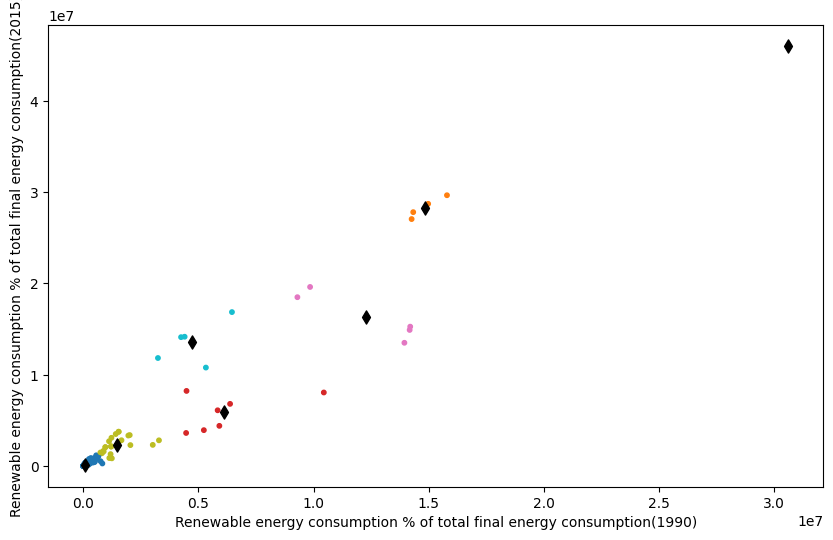

In [150]:
print(cen)

# Applying the inverse_transform function to convert the cluster center
scaler = MinMaxScaler()
scaler.fit(df_ex)  # fit the scaler on the original data
scen = scaler.inverse_transform(cen)
print()
print(scen)

xcen = scen[:, 0]
ycen = scen[:, 1]

# cluster by cluster
plt.figure(figsize=(10.0, 6.0))

cm = plt.cm.get_cmap('tab10')
plt.scatter(df_ex["1990"], df_ex["2015"], 10, labels, marker="o", cmap=cm)
plt.scatter(xcen, ycen, 45, "k", marker="d")
plt.xlabel("Renewable energy consumption % of total final energy consumption(1990)")
plt.ylabel("Renewable energy consumption % of total final energy consumption(2015)")
plt.show()
